In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd

In [4]:
dat = np.loadtxt('data.txt')

In [5]:
#df = pd.DataFrame(dat, columns=['field','RMS xsize'])
#df.plot(x='field', xlim=[-120,-50],ylim=[0,.001])

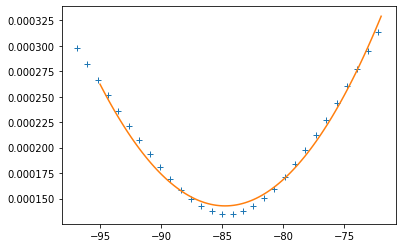

In [14]:
x = dat[:,0]; y = dat[:,1]
z = np.polyfit(x,y,2)
p = np.poly1d(z)
xp = np.linspace(-95, -72, 100)
fig, ax = plt.subplots()
ax.plot(x, y,'+')
ax.plot(xp, p(xp))

In [15]:
print(z)

[1.14189309e-06 1.93596652e-04 8.34834791e-03]


In [16]:
np.roots(z)

array([-84.77004305+11.18084945j, -84.77004305-11.18084945j])